# EDA
### (Exploratory Data Analysis)
### 데이터셋을 다양한 관점에서 살펴보고 탐색하면서 인사이트를 찾는것 

##### 데이터 분석의 이유


```
     각 로우, 컬럼들은 무엇을 의미하고 어떻게 연관되어 있는지를 파악하는 과정
    
    ex) 설문조사 
    1) 몇명이 참여했는지
    2) 연령대는 어떤지
    3) 참여자들의 학력은 어느정도인지
    4) 가족관계는 어떠한지
    5) 관심사는 어떠한지
        .
        .
        .
        
        
   + 시각화와 통계자료들을 통해 새로운 내용을 도출해 낼 수 있다.
```

---
data: young survey
```
columns 0~18: 음악취향 / 19~30: 영화취향 / 31~62: 취미,관심사 / 63~72: 공포증 / 73~75: 건강습관
        76~132: 성격, 인생관등  / 133~139: 소비습관 / 140~146: 기본 정보
```

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('data/lec11_EDA/young_survey.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


In [3]:
basicInfo = df.iloc[:, 140:]
basicInfo.head()

,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,20.0,176.0,67.0,2.0,female,right,high school
3,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,20.0,170.0,59.0,1.0,female,right,high school


In [4]:
basicInfo.describe() # 수치적으로 판단될 수 있는 것들만 표시된다.

,Age,Height,Weight,Number of siblings
count,997.000000,982.000000,981.000000,995.000000
mean,20.439318,173.610998,66.407747,1.300503
std,2.835443,9.373842,13.862403,1.015548
min,15.000000,148.000000,41.000000,0.000000
25%,19.000000,167.000000,55.000000,1.000000
50%,20.000000,173.000000,64.000000,1.000000
75%,22.000000,180.000000,75.000000,2.000000
max,30.000000,203.000000,165.000000,10.000000


In [5]:
#나머지 3항목은 직접 확인해야한다.
#성별
basicInfo['Gender'].value_counts()

female    587
male      405
Name: Gender, dtype: int64

In [6]:
# X손잡이
basicInfo['Handedness'].value_counts()

right    895
left      99
Name: Handedness, dtype: int64

In [7]:
# 최종학력
basicInfo['Education'].value_counts()

high school          618
bachelor's degree    207
middle school         78
master's degree       78
elementary school     10
doctorate degree       5
Name: Education, dtype: int64

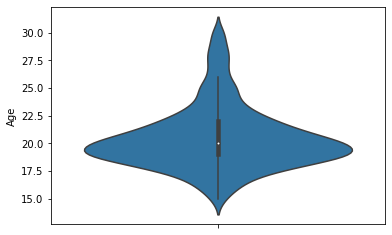

In [8]:
#나이 분포
sns.violinplot(data=basicInfo, y='Age')

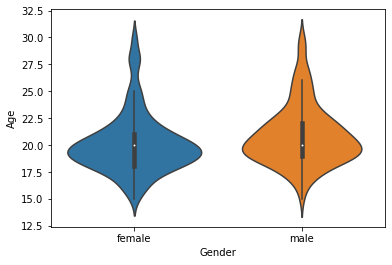

In [9]:
# 성별에 따른 나이 분포
sns.violinplot(data=basicInfo, x='Gender', y='Age')

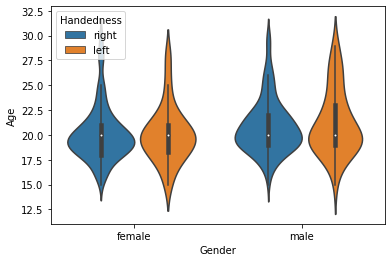

In [10]:
# 주요 사용하는 손과 나이에 따른 나이 분포
sns.violinplot(data=basicInfo, x='Gender', y='Age', hue='Handedness')

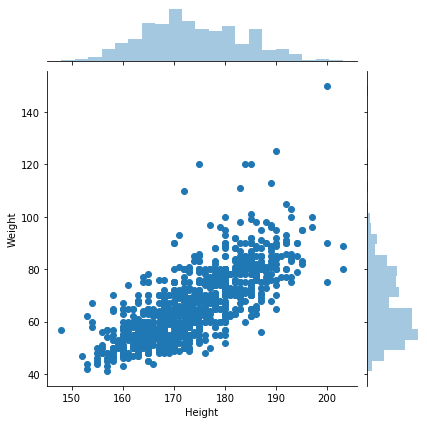

In [11]:
sns.jointplot(data=basicInfo, x='Height', y='Weight') # joint plot으로 키와 몸무게의 연관성, 키분포와 몸무게의 분포도 한눈에 볼 수 있다.

---
### 취향 데이터 분석

In [12]:
musicInfo = df.iloc[:,:19]
musicInfo.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


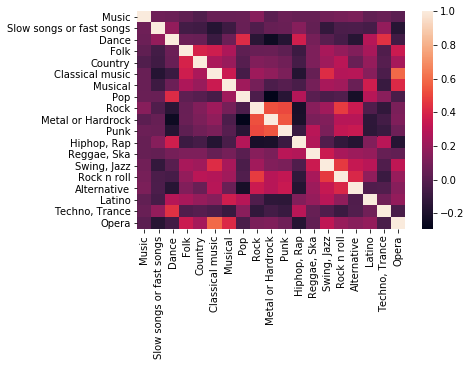

In [13]:
sns.heatmap(musicInfo.corr())

In [14]:
df.corr()['Age'].sort_values(ascending=False) # 나이에 대한 컬럼만 뽑아내기 , 컬럼명 쓰는 순서가 뒤에 나옴

Age                        1.000000
Weight                     0.238893
Elections                  0.212319
Prioritising workload      0.156256
Reliability                0.148141
                             ...   
Mood swings               -0.111890
Getting up                -0.119888
Questionnaires or polls   -0.128187
Shopping centres          -0.133800
Changing the past         -0.146895
Name: Age, Length: 139, dtype: float64

---
## Q
```
브런치 까페 음악 셀렉션

대위는 신촌에서 대학생들을 대상으로 브런치 카페를 운영합니다.

손님들의 취향에 딱 맞는 음악을 틀고 싶은데요. 브런치 카페이기 때문에, 일찍 일어나는 사람들이 좋아할 만한 음악이 무엇인지 분석해 보려고 합니다.

주어진 데이터(다운로드)의 “Getting up”이라는 column을 보면 사람들이 아침에 일어나는 걸 얼마나 어려워하는지 알 수 있습니다. 5라고 대답한 사람들은 아침에 일어나는 걸 아주 어려워 하는 사람들이고, 1이라고 대답한 사람들은 아침에 쉽게 일어난다는 거죠.
```
Q1. 이 데이터로 봤을 때, 아침에 일찍 일어나는 사람들이 가장 좋아할 만한 음악 장르는 무엇인가요?

In [15]:
musicInfo=df.iloc[:,:19]
musicInfo['Getting up'] = df['Getting up']
musicInfo.head()
musicInfo.corr()['Getting up'].sort_values(ascending=True)

Opera                      -0.071819
Slow songs or fast songs   -0.052613
Folk                       -0.049612
Punk                       -0.029189
Metal or Hardrock          -0.026769
Country                    -0.025315
Latino                     -0.015060
Reggae, Ska                -0.008434
Musical                     0.011869
Classical music             0.014285
Swing, Jazz                 0.019556
Techno, Trance              0.019863
Dance                       0.027249
Alternative                 0.027540
Rock n roll                 0.028889
Hiphop, Rap                 0.038980
Pop                         0.079101
Music                       0.090009
Rock                        0.105245
Getting up                  1.000000
Name: Getting up, dtype: float64

```
"Getting up" 값이 커지면 커질수록 Corr()값이 작아진다면 (= 선호도가 줄어든다면), "Getting up" 값이 작아질수록 더 선호도가 증가, 상관계수가 높지만은 않으니 가볍게 참고하면 될 것 같다
```

---
## Q
```
경영학과 3학년이 된 영준이는 스타트업을 준비하고 있습니다. 사업 아이템을 고민하면서, 나름대로 가설을 몇 개 세워봤습니다.

악기를 다루는 사람들은 시 쓰기를 좋아하는 경향이 있을 것이다.
외모에 돈을 많이 투자하는 사람들은 브랜드 의류를 선호할 것이다.
메모를 자주 하는 사람들은 새로운 환경에 쉽게 적응할 것이다.
워커홀릭들은 건강한 음식을 먹으려는 경향이 있을 것이다.
이 내용을 사업 아이템으로 확장하기 전에, 데이터를 통해 가설을 검증해보려고 하는데요.
설문조사 데이터(다운로드)를 바탕으로, 가장 가능성이 낮은 가설을 골라보세요.

이 가설과 관련이 있는 column은 다음과 같습니다.

Branded clothing: 나는 브랜드가 없는 옷보다 브랜드가 있는 옷을 선호한다.
Healthy eating: 나는 건강하거나 품질이 좋은 음식에는 기쁘게 돈을 더 낼 수 있다.
Musical instruments: 나는 악기 연주에 관심이 많다.
New environment: 나는 새 환경에 잘 적응하는 편이다.
Prioritising workload: 나는 일을 미루지 않고 즉시 해결해버리려고 한다.
Spending on looks: 나는 내 외모에 돈을 많이 쓴다.
Workaholism: 나는 여가 시간에 공부나 일을 자주 한다.
Writing: 나는 시 쓰기에 관심이 많다.
Writing notes: 나는 항상 메모를 한다.


1. 악기를 다루는 사람들은 시 쓰기를 좋아하는 경향이 있을 것이다.

2. 외모에 돈을 많이 투자하는 사람들은 브랜드 의류를 선호할 것이다.

3. 메모를 자주 하는 사람들은 새로운 환경에 쉽게 적응할 것이다.

4. 워커홀릭들은 건강한 음식을 먹으려는 경향이 있을 것이다.
```

In [16]:
df[['Branded clothing', 'Healthy eating', 'Musical instruments', 'New environment', 'Prioritising workload', 'Spending on looks',
                  'Workaholism', 'Writing', 'Writing notes']].head()

,Branded clothing,Healthy eating,Musical instruments,New environment,Prioritising workload,Spending on looks,Workaholism,Writing,Writing notes
0,5.0,4.0,3.0,4.0,2.0,3.0,4.0,2.0,5.0
1,1.0,3.0,1.0,4.0,2.0,2.0,5.0,1.0,4.0
2,1.0,3.0,5.0,3.0,2.0,3.0,3.0,5.0,5.0
3,3.0,3.0,1.0,1.0,4.0,4.0,5.0,3.0,4.0
4,4.0,4.0,3.0,4.0,1.0,3.0,3.0,1.0,2.0


In [17]:
print(df.corr().loc['Musical instruments', 'Writing'])
# print(df[['Musical instruments', 'Writing']].corr()) 로도 표의 성분을 확인 할 수 있다.
print(df.corr().loc['Branded clothing', 'Spending on looks'])
print(df.corr().loc['Writing notes', 'New environment'])
print(df.corr().loc['Workaholism', 'Healthy eating'])

0.34381621439042986
0.4183989446458914
-0.07939652994810564
0.23864443283866651


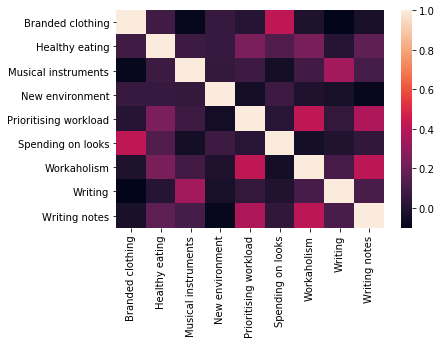

In [18]:
sns.heatmap(df[['Branded clothing', 'Healthy eating', 'Musical instruments', 'New environment', 'Prioritising workload', 'Spending on looks',
                  'Workaholism', 'Writing', 'Writing notes']].corr())

## 클러스터 분석 
#### Cluster Analysis (무리 분석)
-> 관심사를 통해 문과 / 이과로  나눈다면?

In [5]:
interests = df.loc[:,'History' : 'Pets'] # 관심사에 대한 내용을 뽑아온다
interests.head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0


In [6]:
# 연관성 파악하기
corr = interests.corr()
corr

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
History,1.000000,0.281493,0.400845,0.008328,0.079638,0.022010,0.027346,0.054872,0.014807,0.014117,...,-0.013262,0.064929,0.033196,-0.087338,-0.061804,0.135597,0.185301,0.024960,0.061201,0.031920
Psychology,0.281493,1.000000,0.195338,0.043030,0.065774,0.000075,-0.077712,0.087072,0.202913,0.058541,...,-0.083949,0.006261,0.042099,-0.012857,0.058210,0.060809,0.268484,0.020027,0.058522,0.053322
Politics,0.400845,0.195338,1.000000,0.104033,0.130293,0.058863,0.088846,0.304575,-0.090532,-0.058849,...,0.042173,0.069026,-0.018266,-0.023371,-0.064327,0.186743,0.085306,0.009968,0.090355,-0.055446
Mathematics,0.008328,0.043030,0.104033,1.000000,0.595188,0.157779,0.295564,0.218796,0.078043,0.181953,...,0.055701,0.083826,0.031867,-0.111193,-0.156334,0.249863,-0.018890,-0.030492,0.098004,-0.031633
Physics,0.079638,0.065774,0.130293,0.595188,1.000000,0.103793,0.339429,0.010678,0.212261,0.322827,...,0.016199,0.118929,0.047723,-0.211790,-0.227379,0.430393,0.001382,-0.029794,0.146055,-0.022982
Internet,0.022010,0.000075,0.058863,0.157779,0.103793,1.000000,0.467867,0.164447,-0.101429,-0.107657,...,0.171394,0.009498,-0.049947,0.114478,0.086552,0.190400,-0.149085,0.108927,0.072552,0.006894
PC,0.027346,-0.077712,0.088846,0.295564,0.339429,0.467867,1.000000,0.155285,-0.083648,-0.042937,...,0.080169,0.127505,-0.005789,-0.050504,-0.162955,0.420528,-0.177682,0.004907,0.154008,-0.066745
Economy Management,0.054872,0.087072,0.304575,0.218796,0.010678,0.164447,0.155285,1.000000,-0.173794,-0.180850,...,0.049986,0.071795,-0.045067,0.090132,0.111786,0.060767,-0.009515,0.066244,0.126719,-0.061738
Biology,0.014807,0.202913,-0.090532,0.078043,0.212261,-0.101429,-0.083648,-0.173794,1.000000,0.689980,...,-0.011216,0.055579,0.268927,0.012611,0.090339,0.151654,0.168296,0.013397,0.039657,0.169852
Chemistry,0.014117,0.058541,-0.058849,0.181953,0.322827,-0.107657,-0.042937,-0.180850,0.689980,1.000000,...,-0.041194,0.042481,0.200144,-0.083627,0.002447,0.195571,0.098171,-0.024690,0.035784,0.106649


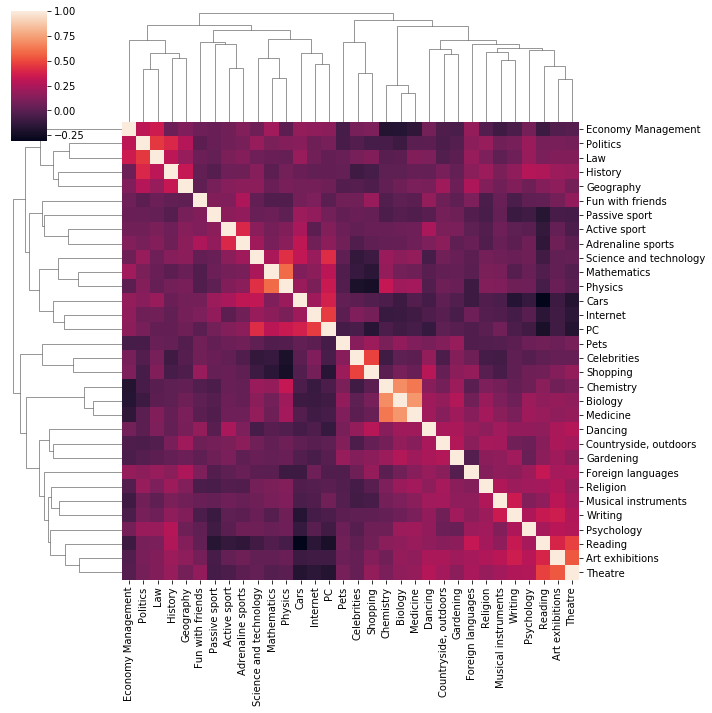

In [8]:
sns.clustermap(corr) # 연관성 있는 관심사끼리 묶어놓음

---
#### 문제
## 요즘 인기 직업은?

In [19]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/lec11_EDA/occupations.csv')
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### Q1. 1. 여성분들이 가장 많이 종사하고 있는 직종이 무엇인지 파악해 보세요.

In [20]:
df.loc[df['gender']=='F', 'occupation'].value_counts().sort_values(ascending=False)

student          60
other            36
administrator    36
librarian        29
educator         26
writer           19
artist           13
healthcare       11
marketing        10
programmer        6
homemaker         6
none              4
scientist         3
executive         3
salesman          3
entertainment     2
lawyer            2
engineer          2
retired           1
technician        1
Name: occupation, dtype: int64

### Q2. 2. 남성분들이 가장 많이 종사하고 있는 직종 상위 3개를 고르세요.

In [21]:
df.loc[df['gender']=='M', 'occupation'].value_counts().sort_values(ascending=False)

student          136
educator          69
other             69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
writer            26
technician        26
librarian         22
entertainment     16
marketing         16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
none               5
healthcare         5
homemaker          1
Name: occupation, dtype: int64

---
문제
## 타이타닉 EDA
```
RMS 타이타닉은 1912년에 빙산과 충돌해 침몰한 여객선입니다. 타이타닉호의 침몰은 무려 1514명 정도가 사망한 비운의 사건이죠. 영화 ‘타이타닉’으로 인해 이름이 가장 널리 알려진 여객선이기도 합니다.

우리에게 주어진 titanic.csv 파일(다운로드)에는 당시 탑승자들의 정보가 담겨 있습니다. 생존 여부, 성별, 나이, 지불한 요금, 좌석 등급 등의 정보가 있는데요.

생존 여부는 'Survived' column에 저장되어 있습니다. 0이 사망, 1이 생존을 의미합니다.
좌석 등급은 'Pclass' column에 저장되어 있습니다. 1은 1등실, 2는 2등실, 3은 3등실을 의미합니다.
지불한 요금은 'Fare' column에 저장되어 있습니다.
다양한 방면으로 EDA(탐색적 데이터 분석)를 한 후, 다음 보기 중 맞는 것을 모두 고르세요.

1. 타이타닉의 승객은 30대와 40대가 가장 많다.

2. 가장 높은 요금을 낸 사람은 30대이다.

3. 생존자가 사망자보다 더 많다.

4. 1등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다.

5. 가장 생존율이 높은 객실 등급은 1등실이다.

6. 나이가 어릴수록 생존율이 높다.

7. 나이보다 성별이 생존율에 더 많은 영향을 미친다.
```

In [19]:
df = pd.read_csv('data/lec11_EDA/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


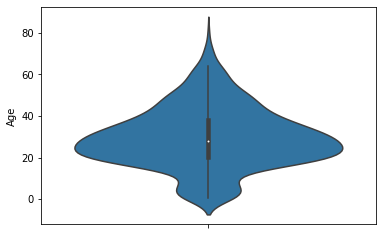

In [32]:
#1. 타이타닉의 승객은 30대와 40대가 가장 많다.
sns.violinplot(data=df, y='Age')
# 20대가 가장 많다

In [133]:
#2. 가장 높은 요금을 낸 사람은 30대이다.
df.loc[df['Fare']==df['Fare'].max()]
#df.plot(kind='scatter', x='Age', y='Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [134]:
#3. 생존자가 사망자보다 더 많다.
df['Survived'].value_counts()
# 생존자가 1, 사망자가 0이므로 사망자가 더 많다

0    549
1    342
Name: Survived, dtype: int64

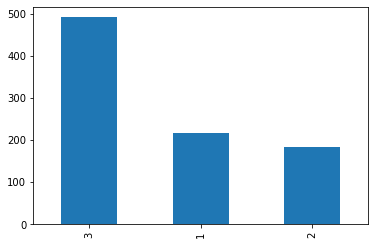

In [59]:
#4. 1등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다.
df['Pclass'].value_counts().plot(kind='bar')
# 3등실이 가장 많다.

In [121]:
## 5. 가장 생존율이 높은 객실 등급은 1등실이다.
class1Survived = df.loc[df['Pclass']==1, 'Survived'].mean()
class2Survived = df.loc[df['Pclass']==2, 'Survived'].mean()
class3Survived = df.loc[df['Pclass']==3, 'Survived'].mean()
print('class 1 Survive rate : '+str(class1Survived))
print('class @ Survive rate : '+str(class2Survived))
print('class 3 Survive rate : '+str(class3Survived))
#1등석이 약 63%로 가장 생존률이 높다.

class 1 Survive rate : 0.6296296296296297
class @ Survive rate : 0.47282608695652173
class 3 Survive rate : 0.24236252545824846


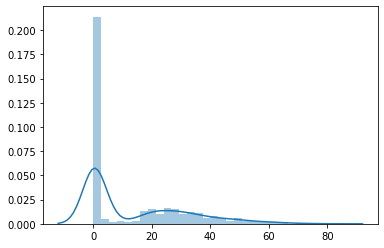

In [85]:
#6. 나이가 어릴수록 생존율이 높다.
sns.distplot(df[['Age', 'Survived']], bins=30)
# 1대 미만은 나이가 어릴수록 생존률이 높지만
# 10대 중반의 아이들은 그렇지 아니하다.

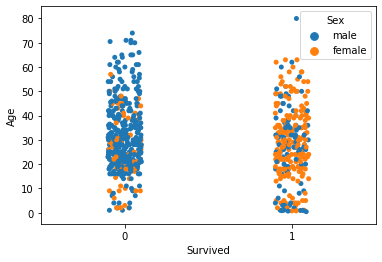

In [136]:
#7. 나이보다 성별이 생존율에 더 많은 영향을 미친다.
sns.stripplot(data=df, x='Survived', y='Age', hue='Sex')
# 생존률이 성별에 많은 영향을 미친다.